In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
df = df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt',
         'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [27]:
df.groupby('VIP').Transported.mean()

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

In [25]:
df.groupby('Destination').Transported.mean()

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

In [28]:
df.groupby('HomePlanet').Transported.mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [29]:
df.groupby('CryoSleep').Transported.mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

In [37]:
df.groupby('HomePlanet').Transported.describe()

,count,unique,top,freq
HomePlanet,,,,
Earth,4602,2,False,2651
Europa,2131,2,True,1404
Mars,1759,2,True,920


In [38]:
df.groupby('Destination').Transported.describe()

,count,unique,top,freq
Destination,,,,
55 Cancri e,1800,2,True,1098
PSO J318.5-22,796,2,True,401
TRAPPIST-1e,5915,2,False,3128


In [35]:
df['VIP'].fillna(False, inplace=True)
df['CryoSleep'].fillna(False, inplace=True)
df['RoomService'].fillna(0, inplace=True)
df['FoodCourt'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)
df['Age'].fillna(df.Age.mean(), inplace=True)
df['HomePlanet'].fillna('Earth', inplace=True)
df['Destination'].fillna('TRAPPIST-1e', inplace=True)

/tmp/ipykernel_38963/2892721706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VIP'].fillna(False, inplace=True)
/tmp/ipykernel_38963/2892721706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CryoSleep'].fillna(False, inplace=True)
/tmp/ipykernel_38963/2892721706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoomService'].fillna(0, inplace=True)
/tmp/ipykernel_38963/2892721706.py:4: SettingWithCopyWarning: 


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 568.9+ KB


In [45]:
df.CryoSleep = df.CryoSleep.replace({True: 1, False: 0})
df.Transported = df.Transported.replace({True: 1, False: 0})
df.VIP = df.VIP.replace({True: 1, False: 0})

/tmp/ipykernel_38963/2183138889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CryoSleep = df.CryoSleep.replace({True: 1, False: 0})
/tmp/ipykernel_38963/2183138889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Transported = df.Transported.replace({True: 1, False: 0})
/tmp/ipykernel_38963/2183138889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [47]:
df = pd.get_dummies(df)

<AxesSubplot:>

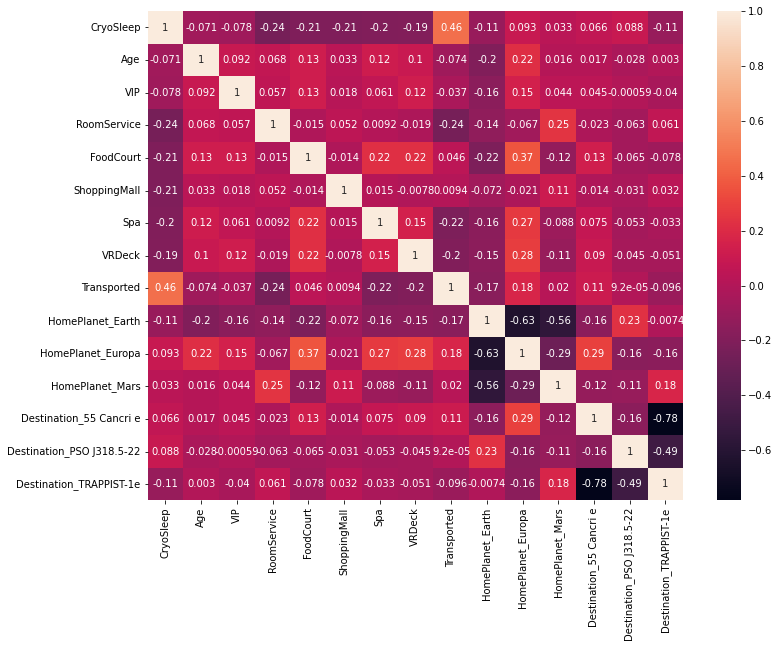

In [54]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
X = df.drop(columns='Transported')
y = df.Transported

In [51]:
model = LogisticRegression(max_iter = len(X))
model.fit(X, y)

LogisticRegression(max_iter=8693)

In [69]:
df = pd.read_csv('test.csv')

In [70]:
df = df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt',
         'ShoppingMall', 'Spa', 'VRDeck']]

df['VIP'].fillna(False, inplace=True)
df['CryoSleep'].fillna(False, inplace=True)
df['RoomService'].fillna(0, inplace=True)
df['FoodCourt'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)
df['Age'].fillna(df.Age.mean(), inplace=True)
df['HomePlanet'].fillna('Earth', inplace=True)
df['Destination'].fillna('TRAPPIST-1e', inplace=True)

X_test = pd.get_dummies(df)

X_test.CryoSleep = X_test.CryoSleep.replace({True: 1, False: 0})
X_test.VIP = X_test.VIP.replace({True: 1, False: 0})

In [71]:
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,1


In [72]:
y_pred = model.predict(X_test)

In [78]:
y_pred.shape

(4277,)

In [88]:
submission = pd.read_csv('test.csv')
submission = pd.DataFrame({'PassengerId':submission.PassengerId, 'Transported': y_pred})

submission.Transported.replace({1:True, 0:False}, inplace=True)

In [89]:
submission.to_csv('submission.csv', index=False)